In [4]:
import numpy as np
import pandas as pd
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# [0] Load Data From NWIS

Start Date is 1985-10-01 <br>
End Date is 2023-04-25

Data retreived from [USGS Website](https://waterdata.usgs.gov/nwis) <br>
File was saved as .txt file and converted to .csv using Pandas.

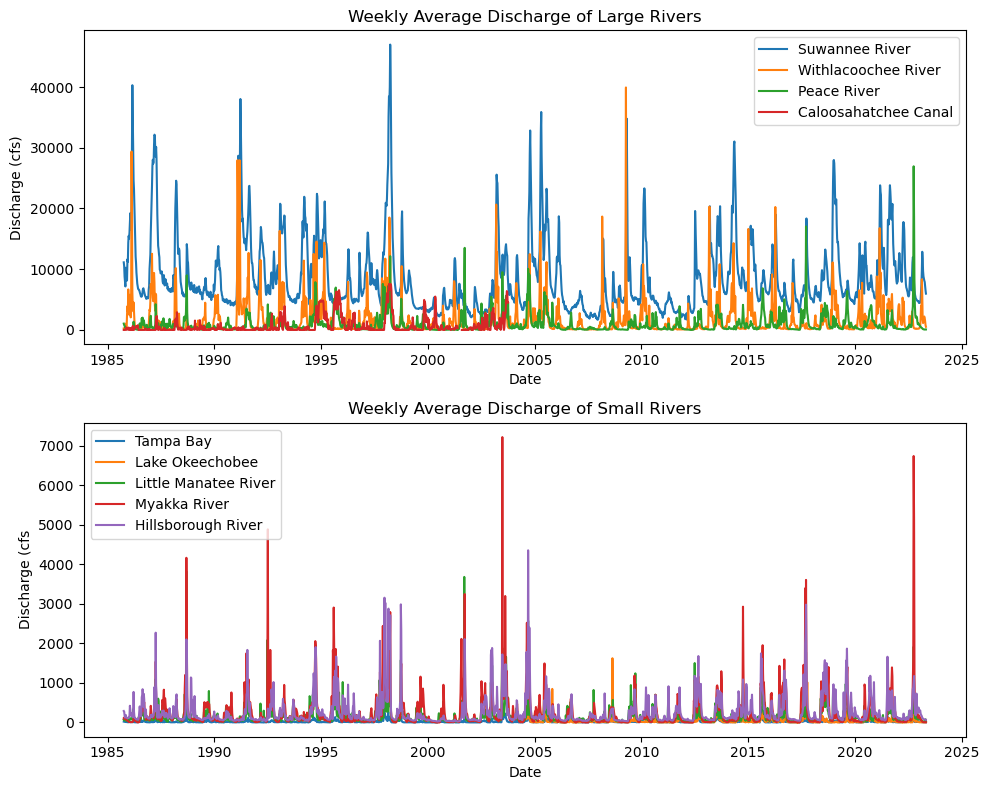

In [7]:
# Create a dictionary to map site numbers to river names
site_to_river = {'2306647': 'Tampa Bay',
                 '2296750': 'Peace River',
                 '2274325': 'Lake Okeechobee',
                 '2323500': 'Suwannee River',
                 '2319000': 'Withlacoochee River',
                 '2303330': 'Hillsborough River',
                 '2300500': 'Little Manatee River',
                 '2298830': 'Myakka River',
                 '2292000': 'Caloosahatchee Canal'}

# Read the CSV files and combine them into one DataFrame
caloo_df = pd.read_csv('Caloosahatchee_Data.txt', delimiter='\t', usecols=['site_no', 'datetime', 'discharge'], parse_dates=['datetime'], index_col='datetime')
hills_df = pd.read_csv('Hillsborough_Data.txt', delimiter='\t', usecols=['site_no', 'datetime', 'discharge'], parse_dates=['datetime'], index_col='datetime')
manat_df = pd.read_csv('LittleManatee_Data.txt', delimiter='\t', usecols=['site_no', 'datetime', 'discharge'], parse_dates=['datetime'], index_col='datetime')
myakk_df = pd.read_csv('Myakka_Data.txt', delimiter='\t', usecols=['site_no', 'datetime', 'discharge'], parse_dates=['datetime'], index_col='datetime')
okeec_df = pd.read_csv('Okeechobee_Data.txt', delimiter='\t', usecols=['site_no', 'datetime', 'discharge'], parse_dates=['datetime'], index_col='datetime')
peace_df = pd.read_csv('Peace_River_Data.txt', delimiter='\t', usecols=['site_no', 'datetime', 'discharge'], parse_dates=['datetime'], index_col='datetime')
suwan_df = pd.read_csv('Suwannee_Data.txt', delimiter='\t', usecols=['site_no', 'datetime', 'discharge'], parse_dates=['datetime'], index_col='datetime')
tampa_df = pd.read_csv('Tampa_Data.txt', delimiter='\t', usecols=['site_no', 'datetime', 'discharge'], parse_dates=['datetime'], index_col='datetime')
witha_df = pd.read_csv('Withlacoochee_Data.txt', delimiter='\t', usecols=['site_no', 'datetime', 'discharge'], parse_dates=['datetime'], index_col='datetime')

# Combine all the river DataFrames into one DataFrame
small_rivers = [tampa_df, okeec_df, manat_df, myakk_df, hills_df]
big_rivers = [suwan_df, witha_df, peace_df, caloo_df]

# Create a figure with two subplots (big rivers and small rivers)
fig, (ax_left, ax_right) = plt.subplots(2, 1, figsize=(10, 8))

# Plot each big river as a line on the left subplot
for river_df in big_rivers:
    river_df['discharge'] = pd.to_numeric(river_df['discharge'], errors='coerce')
    river_df['discharge'] = river_df['discharge'].where(river_df['discharge'] >= 0) # removes negative values
    site_number = river_df['site_no'].iloc[0]
    river_name = site_to_river.get(str(site_number), 'Unknown River')
    weekly_avg = river_df['discharge'].resample('W').mean()
    ax_left.plot(weekly_avg.index, weekly_avg, label=river_name)

# Set labels and legend for the left subplot
ax_left.set_xlabel('Date')
ax_left.set_ylabel('Discharge (cfs)')
ax_left.set_title('Weekly Average Discharge of Large Rivers')
ax_left.legend()

# Plot each small river as a line on the right subplot
for river_df in small_rivers:
    river_df['discharge'] = pd.to_numeric(river_df['discharge'], errors='coerce')
    river_df['discharge'] = river_df['discharge'].where(river_df['discharge'] >= 0) # removes negative values
    site_number = river_df['site_no'].iloc[0]
    river_name = site_to_river.get(str(site_number), 'Unknown River')
    weekly_avg = river_df['discharge'].resample('W').mean()
    ax_right.plot(weekly_avg.index, weekly_avg, label=river_name)

# Set labels and legend for the right subplot
ax_right.set_xlabel('Date')
ax_right.set_ylabel('Discharge (cfs')
ax_right.set_title('Weekly Average Discharge of Small Rivers')
ax_right.legend()


# Display the plot
plt.subplots_adjust()
plt.tight_layout()
plt.show()
